<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2022 - Homework 01</h1>

<h3 style="color:blue">2022-04-04</h3>

<hr>

<h3 style="color:gray"><i>Project by: Qijun Jin, Johnny Nuñez & Marcos Plaza</i></h3>

<h3 style="color:gray"><i>**Computer Scientists**</i></h3>



***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
***

<h1 style="color:blue">Instructions</h1>

### Submissions: 

By **groups** of _about_ three students (meaning: two is OK, four is not advisable but possible. Individual homeworks 
will also be accepted but collaborative work is preferable). 

Please send me an **email** with the team members names as soon as you have formed it.

Only **one copy** of each group's work must be uploaded (by any member)

### Format: 

A Jupyter or R Markdown **notebook,** with a **header** clearly stating the names of all contributors. 

### Documentation: 

Comments **in code cells** (e.g., meaning of variables, parameters, purpose of functions) are necessary but not sufficient.

You are expected to give full explanations of steps taken in your solution (in **Markdown cells**), as well as discussion of results and their meaning.

Do not drear being too verbose or too elementary.

### External sources

Getting inspiration from any book, document, blog, wep page, even mimicking solutions given in there, is **allowed and encouraged,** provided you give a **proper reference,**
understand every such material, and explain it in you own words, even more exhaustively.

Dare not **copy/paste literally.** I do detect it, believe me, even with a missing source reference. Bleak consequences.

### Deadline:

Completed assignments are due on Tuesday, April 19. They are to be uploaded to the Virtual Campus.

<h1 style="color:blue">01 - Stan version of a conjugate prior problem</h1>

<h2 style="color:blue">Modelling Earthquake Waiting Times</h2>

Consider the problem in `Exponential.02.Earthquake` (notebook in 2022-03-28 folder), where the goal is to study earthquake waiting times.

Likelihood is modelled as an $\expdist(\lambda)$ and $\lambda$ is given a conjugate prior, $\lambda\sim\gammadist(\alpha,\beta)$.

In this notebook some simulations are performed for:

01. Prior pdf for $\lambda$.
02. Prior predictive pdf for the waiting time.
03. Posterior pdf for $\lambda$.
04. Posterior predictive for new waiting time.

In `Exponential.02.Earthquake` we use known theoretical (analytical) descriptions of these distributions.

Your task is to redo these simulations using Stan, disregarding analytical conjugate prior formulas, and then comparing your results to the analytical ones. Use this comparison to tune up adjustable parameters in Stan sampling, such as chain length. 

## Our Answer

### Earthquake data:

About Eathquake data to create bayesian model we need assume that:
1. The events are independent 
2. Hazard rate not change during the same year 
3. The rate of the events not change.

From what we have understood as computer scientists in class: 
Thanks to Bayesian statistics we can study sequential problems like this one.
1. As it means, an a priori study is known because it comes from previous studies.

2. The a priori distribution may be important with respect to the sample, but the existing information is subjective and not formalised.

3. The a priori information is small in relation to the sampling ratio.

4. The a priori information is negligible compared to the sample, or we do not want to take it into account.


**All this points is explained in notebook and bayesian theory.**  

##### **IMPORTANT: All this code is obtained from the teacher's notebook.** 
Code based on `02.Exponential.01.Claims.Stan`.

### 01. Prior pdf for $\lambda$.
Assume the conjugate prior $\lambda\sim\operatorname{Gamma}(\alpha,\beta)$ which 30 is waiting time days. Suppose our prior expectation for $\lambda$ is $1/30$, and we wish to use a prior effective sample size of one interval between earthquakes. It should also be noted that $\alpha/\beta$ can exist in an infinite number of combinations. 


In [1]:
prior.a<-1
prior.b<-30

Theor.lambda.mean<-prior.a/prior.b
# Theor.lambda.mode<-(prior.a-1)/prior.b  # For alpha>1, 0 for alpha=1.
Theor.lambda.var<-prior.a/prior.b^2
Theor.lambda.sd<-sqrt(Theor.lambda.var)
sprintf("Mean: %s", round(Theor.lambda.mean,4))
sprintf("Var: %s", round(Theor.lambda.var,4))
sprintf("Std: %s", round(Theor.lambda.sd,4))

[1] "Mean: 0.0333"

[1] "Var: 0.0011"

[1] "Std: 0.0333"

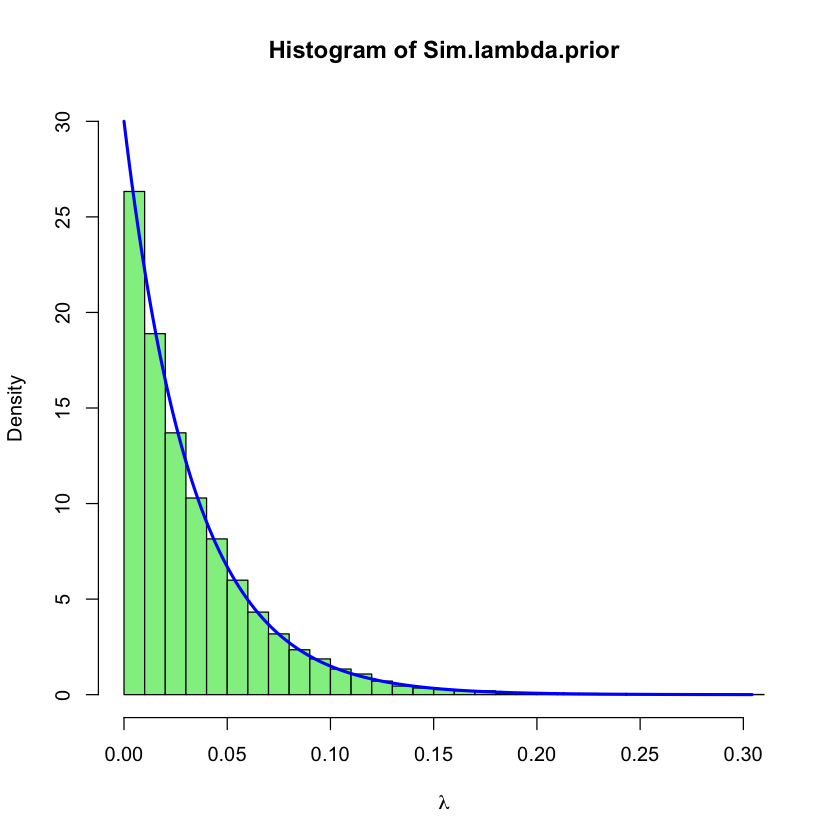

In [2]:
N<-10000
Sim.lambda.prior<-rgamma(N,prior.a,prior.b)
# Plot histogram, compare with the theoretical Gamma pdf 
options(repr.plot.width=7,repr.plot.height=7)
hist(Sim.lambda.prior,freq=FALSE,col="LightGreen",xlab=expression(lambda),ylim=c(0,30),breaks=25)
v<-seq(0,max(Sim.lambda.prior),length=1000)
lines(v,dgamma(v,shape=prior.a,rate=prior.b),lwd=2.5,col="blue")

### 2. Prior predictive pdf for the waiting time
#### Simulate from the prior predictive. Likelihood is exponential with parameter lambda

 num [1:10000] 37.2 390.6 23.7 168.1 164.3 ...


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00      9.94     29.48    244.11     89.31 274255.63 

5%    10%    20%    30%    40%    50%    60%    70%    80%    90% 
  1.61   3.43   7.39  12.69  19.59  29.48  43.94  69.88 120.16 273.11

[1] 273.11

 num [1:9000] 37.2 23.7 168.1 164.3 10.1 ...


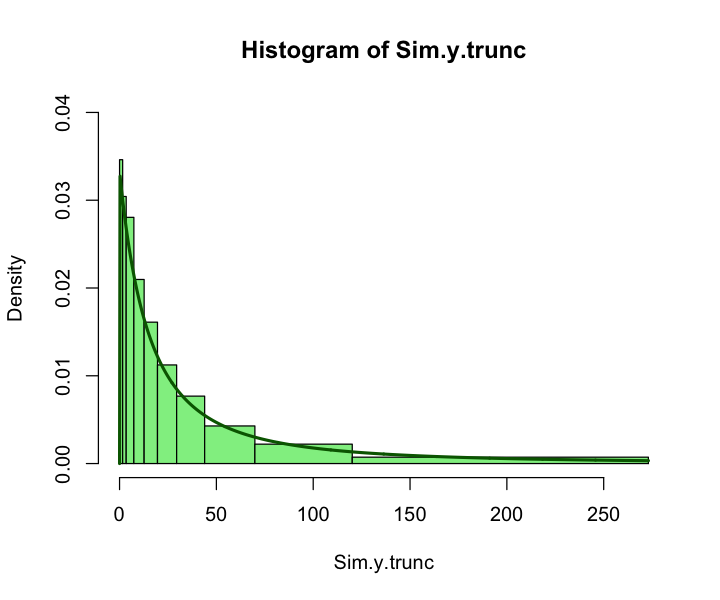

In [3]:
Theor.pred.pdf<-function(y,a,b){return(ifelse(y>0,a*b^{a}/(y+b)^(a+1),0))}
# Simulate from the prior predictive. Likelihood is exponential with parameter lambda
Sim.y<-rexp(N,rate=Sim.lambda.prior) # generate distribution prior
str(Sim.y)
summary(Sim.y)
q.Sim.y<-quantile(Sim.y,c(0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9))
round(q.Sim.y,2)
ymax<-max(q.Sim.y)
round(ymax,2)
Sim.y.trunc<-Sim.y[Sim.y<ymax]  # truncate in order to be able to plot the histogram
str(Sim.y.trunc)

# Plot histogram, 
options(repr.plot.width=6,repr.plot.height=5)
ymax<-max(q.Sim.y)
u<-seq(0,ymax,length=1000)
yu<-Theor.pred.pdf(u,a=prior.a,b=prior.b)
hist(Sim.y.trunc,freq=FALSE,col="LightGreen",breaks=c(min(Sim.y.trunc),q.Sim.y,max(Sim.y.trunc)),ylim=c(0,0.040))
lines(u,yu,lwd=2.5,col="DarkGreen")

# 3. Posterior distribution

**IMPORTANT: So if we approximate our a priori distribution and it has similar likelihood, we can calculate the posteriori easily. The exponential-gamma model makes the prior a conjugate prior, so they have the same distribution** 
Posterior pdf is $\lambda\sim\operatorname{Gamma}(\alpha',\beta')$,

$$
    \left\{
    \begin{array}{lcl}
    \alpha'&=&\alpha+n,\\[0.2cm]
    \beta'&=&\beta+n\,\overline{y}.
    \end{array}\right.
$$

Data:
$y = (3, 16, 8, 114, 60, 4, 23, 30, 105, 1)$

 num [1:10000] 0.0334 0.0208 0.0183 0.0321 0.0302 ...


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.004958 0.019809 0.024775 0.025665 0.030687 0.063379 

5%  10%  20%  30%  40%  50%  60%  70%  80%  90% 
0.01 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.04

[1] 0.04

 num [1:9000] 0.0334 0.0208 0.0183 0.0321 0.0302 ...


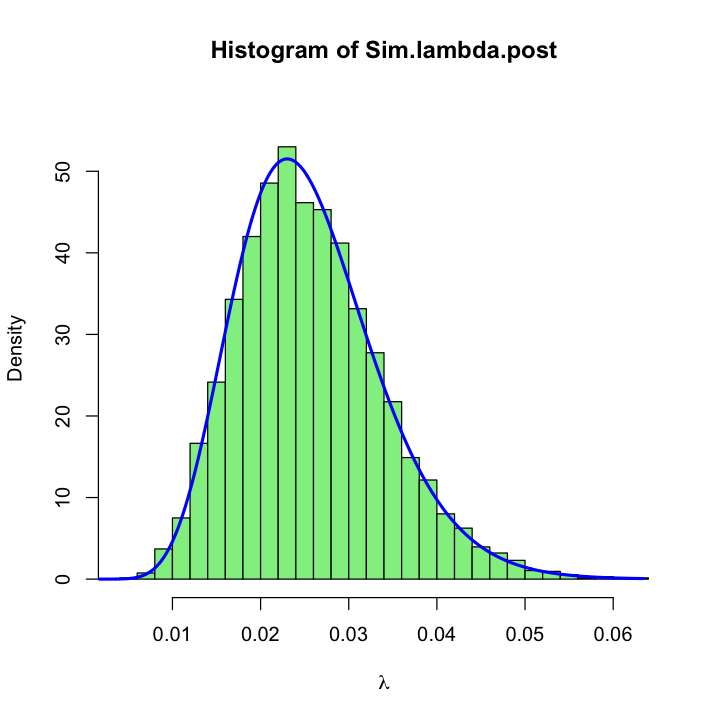

In [4]:
y<-c(16, 8, 114, 60, 4, 23, 30, 105, 1)

n<-length(y)
ybar<-mean(y)
nybar<-sum(y)

post.a<-prior.a+n
post.b<-prior.b+nybar


Sim.lambda.post<-rgamma(N,post.a,post.b)

str(Sim.lambda.post)
summary(Sim.lambda.post)
q.Sim.lambda.post<-quantile(Sim.lambda.post,c(0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9))

round(q.Sim.lambda.post,2)
lambdamax<-max(q.Sim.lambda.post)
round(lambdamax,2)
Sim.lambda.post.trunc<-Sim.lambda.post[Sim.lambda.post<lambdamax]  # truncate in order to be able to plot the histogram
str(Sim.lambda.post.trunc)


# Plot histogram, superimpose the Gamma pdf 
options(repr.plot.width=6,repr.plot.height=6)
v<-seq(0,max(Sim.lambda.post),length=1000)
yv<-dgamma(v,shape=post.a,rate=post.b)
max.yv<-max(yv)
hist(Sim.lambda.post,freq=FALSE,col="LightGreen",xlab=expression(lambda),ylim=c(0,max.yv*1.1),breaks=25)
lines(v,yv,lwd=2.5,col="blue")

### 4. Simulate from the posterior predictive pdf

[1] 43.444

[1] 2359.275

[1] 48.572

 num [1:10000] 37.2 390.6 23.7 168.1 164.3 ...


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0013  11.4132  27.9334  43.5546  57.8018 571.8306 

5%    10%    20%    30%    40%    50%    60%    70%    80%    90% 
  1.95   4.05   8.76  14.00  20.33  27.93  37.22  49.69  67.51 101.94

[1] 101.94

 num [1:9000] 20.03 41.9 81.34 14.85 1.73 ...


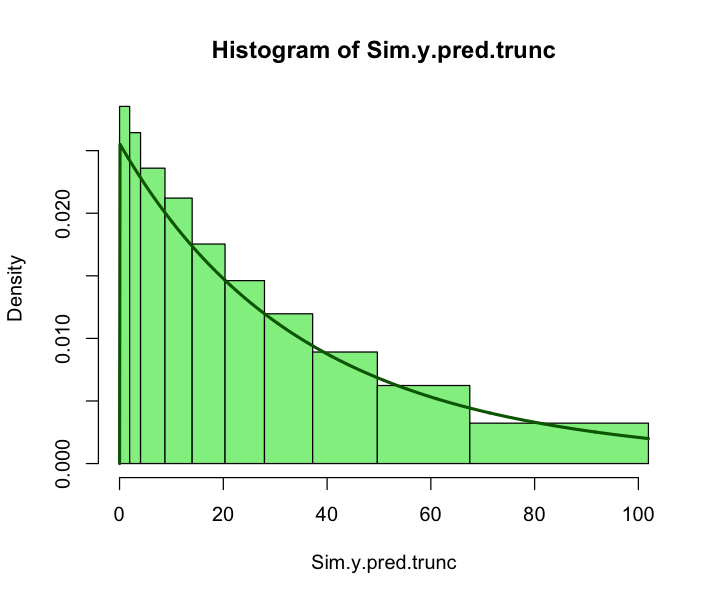

In [5]:
Theor.post.E.y<-post.b/(post.a-1)
Theor.post.var.y<-post.b^2*post.a/((post.a-1)^2*(post.a-2))
Theor.post.sd.y<-sqrt(Theor.post.var.y)
round(Theor.post.E.y,3)
round(Theor.post.var.y,3)
round(Theor.post.sd.y,3)

Sim.y.pred<-rexp(N,rate=Sim.lambda.post)

str(Sim.y)
summary(Sim.y.pred)
q.Sim.y.pred<-quantile(Sim.y.pred,c(0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9))
round(q.Sim.y.pred,2)
ymax<-max(q.Sim.y.pred)
round(ymax,2)
Sim.y.pred.trunc<-Sim.y.pred[Sim.y.pred<ymax]  # truncate in order to be able to plot the histogram
str(Sim.y.pred.trunc)

# Plot histogram, 
options(repr.plot.width=6,repr.plot.height=5)
u<-seq(0,ymax,length=1000)
yu<-Theor.pred.pdf(u,a=post.a,b=post.b)
ymax<-max(yu)
hist(Sim.y.pred.trunc,freq=FALSE,col="LightGreen",
     breaks=c(min(Sim.y.pred.trunc),q.Sim.y.pred,max(Sim.y.pred.trunc)),ylim=c(0,ymax*1.1))
lines(u,yu,lwd=2.5,col="DarkGreen")

# SIMULATION USING RSTAN

Code based on `02.Exponential.01.Claims.Stan`.

In [6]:
require(rstan)

options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



In [7]:
stanmodelcode <- "
data {
    int<lower=0> n;
    real<lower=0> prior_a;
    real<lower=0> prior_b;
    real<lower=0> y[n];
    }
parameters {
    real<lower=0.00001> lambda;
    }
model {
    lambda ~ gamma(prior_a,prior_b);
    y~exponential(lambda);
    }
generated quantities{                // Sampling from the lambda posterior
    real y_pred;
    y_pred = exponential_rng(lambda);
    }
    "

In [8]:
stanDso <- stan_model(model_code = stanmodelcode) 
dat <- list(n = n, y = y, prior_a=prior.a, prior_b=prior.b); 

- **iter** A positive integer specifying the number of iterations for each chain (including warmup). The default is 2000.

- **warmup** A positive integer specifying the number of warmup (aka burnin) iterations per chain. If step-size adaptation is on (which it is by default), this also controls the number of iterations for which adaptation is run (and hence these warmup samples should not be used for inference). The number of warmup iterations should be smaller than iter and the default is iter/2.

In [9]:
# Same hyperparameters `02.Exponential.01.Claims.Stan`
modelfit1 <- sampling(stanDso, data = dat, iter = 2000, warmup=1000, chains=4) 
modelfit1

Inference for Stan model: b0805a512948954a1381856049f94d2f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean    sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
lambda   0.03    0.00  0.01   0.01   0.02   0.02   0.03   0.04  1192    1
y_pred  44.47    0.87 50.42   1.02  11.86  28.41  58.34 181.40  3387    1
lp__   -47.15    0.02  0.68 -49.17 -47.31 -46.88 -46.71 -46.66  1493    1

Samples were drawn using NUTS(diag_e) at Wed Apr 27 18:51:02 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [10]:
# TRYING TO AFF
modelfit2 <- sampling(stanDso, data = dat, iter = 20000, warmup=1000, chains=4) 
modelfit2

Inference for Stan model: b0805a512948954a1381856049f94d2f.
4 chains, each with iter=20000; warmup=1000; thin=1; 
post-warmup draws per chain=19000, total post-warmup draws=76000.

         mean se_mean    sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
lambda   0.03    0.00  0.01   0.01   0.02   0.02   0.03   0.04 27976    1
y_pred  43.48    0.19 48.71   0.99  11.35  27.86  57.93 174.64 62767    1
lp__   -47.17    0.00  0.71 -49.23 -47.34 -46.89 -46.71 -46.66 28890    1

Samples were drawn using NUTS(diag_e) at Wed Apr 27 18:51:03 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

# Explain results:
Mean, std is the same as we see above with the teacher notebook, but posteriori mean is 43,63 a little bit different that we see above "44.47  or 43.48"

In [14]:
modelfit3 <- sampling(stanDso, data = dat, iter = 20000, warmup=10000, chains=5) 
modelfit3

Inference for Stan model: b0805a512948954a1381856049f94d2f.
5 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=50000.

         mean se_mean    sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
lambda   0.03    0.00  0.01   0.01   0.02   0.02   0.03   0.04 17298    1
y_pred  43.64    0.24 48.78   0.97  11.40  28.16  58.51 174.99 39713    1
lp__   -47.18    0.01  0.73 -49.25 -47.35 -46.90 -46.72 -46.66 17512    1

Samples were drawn using NUTS(diag_e) at Wed Apr 27 18:52:03 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

# Explain results:
OK! Web obtain almost the same posteriori.

In [15]:
lambda <- extract(modelfit3, 'lambda')
lambda <- unlist(lambda, use.names=FALSE)
y_pred <- extract(modelfit3, 'y_pred')
y_pred <- unlist(y_pred, use.names=FALSE)

In [22]:
install.packages("actuar")
require(actuar)

also installing the dependency ‘expint’





The downloaded binary packages are in
	/var/folders/2c/gnzzbzv56sxdqjpm4jd2152m0000gn/T//RtmpfPZzLs/downloaded_packages


Loading required package: actuar


Attaching package: ‘actuar’


The following objects are masked from ‘package:stats’:

    sd, var


The following object is masked from ‘package:grDevices’:

    cm




# PLOT based on Claims Notebook

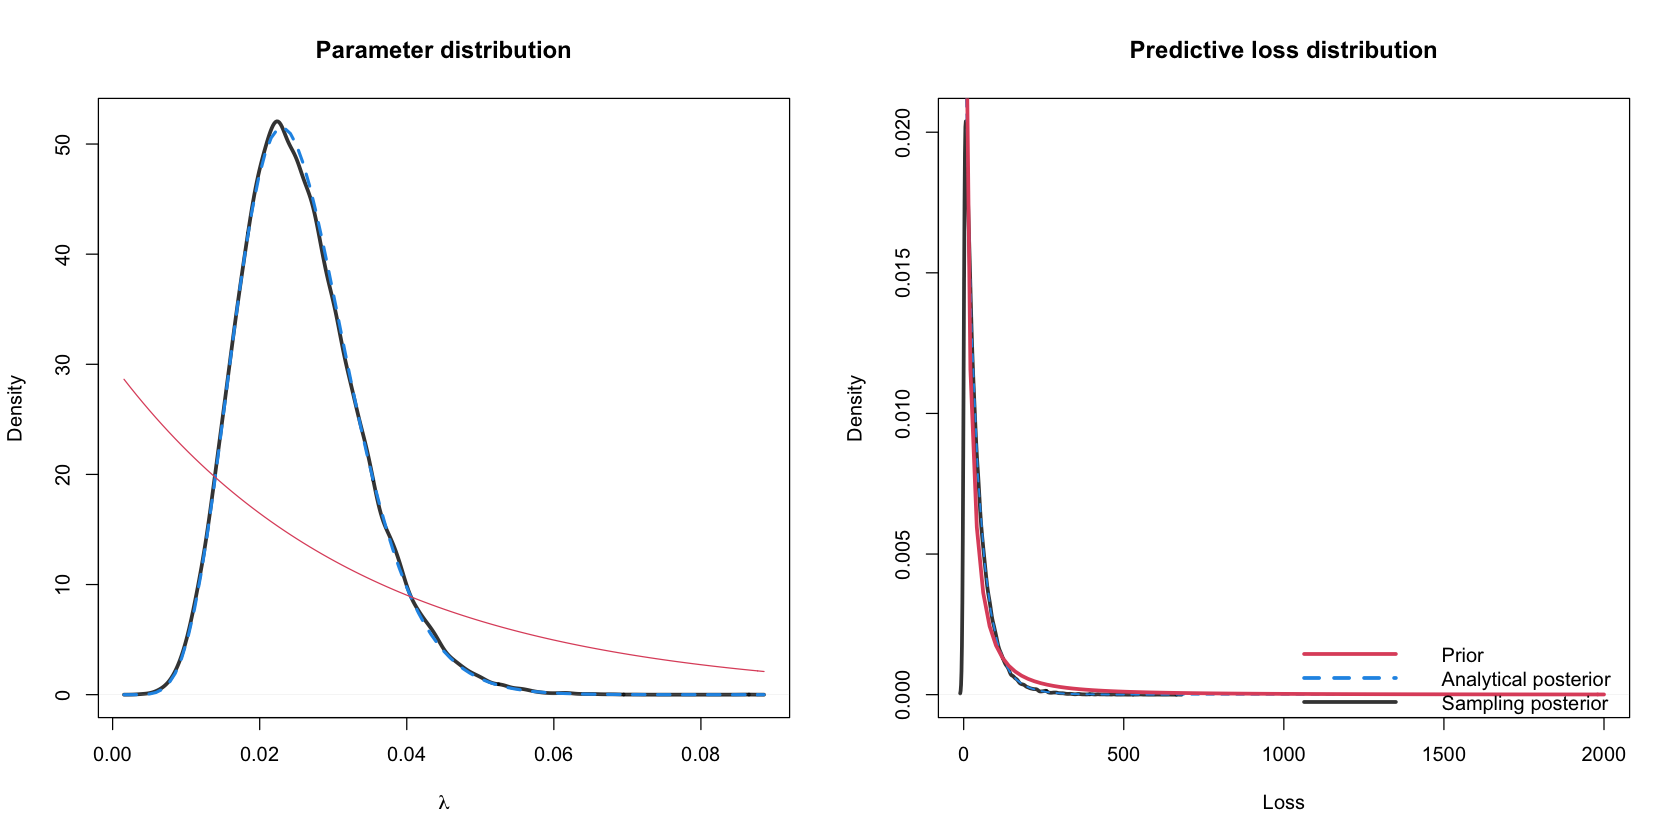

In [23]:

options(repr.plot.width=14,repr.plot.height=7)
old.par<- par(mfrow=c(1,2))
# Simulated posterior parameter
plot(density(lambda),
     xlab=expression(lambda), col=grey(0, 0.8),lwd=3,
     main="Parameter distribution")
# Analytical posterior parameter
curve(dgamma(x, post.a, post.b), 
      add=TRUE, col=4, lty=2, lwd=2.5)
# Analytical prior parameter
curve(dgamma(x, prior.a, prior.b), 
      add=TRUE, col=2)
legend(x=0.005,y=410,legend=c("Prior", "Analytical posterior", "Sampling posterior"), 
           col=c(2, 4, grey(0, 0.8)), lty=c(1,2,1), bty="n",lwd=3)
# Simulated posterior predictive
plot(density(y_pred), xlim=c(1,2000),
     xlab="Loss", col=grey(0, 0.8),
     main="Predictive loss distribution",lwd=3)
# Analytical posterior predictive
curve(dpareto(x, post.a, post.b), 
      add=TRUE, col=4, lwd=1.5, lty=2,5)
# Analytical prior predictive
curve(dpareto(x, prior.a, prior.b), 
      add=TRUE, col=2,lwd=3)
legend(x=920,y=0.0023, legend=c("Prior","Analytical posterior", "Sampling posterior"),
           col=c(2, 4, grey(0, 0.8)),lwd=3, lty=c(1,2,1), bty="n")
par(old.par)

<h1 style="color:blue">02 - A more elaborate mixture prior for the spinning coin</h1>

### Problem statement

(continued from Diaconis experiment)

On reflection, it was decided that tails had come up more often than heads in the past; further some coins seemed likely to be symmetric. 

Thus, a final approximation to the prior was taken as:

$\mskip-800mu 0.50\cdot\betadist(10,20) + 0.20\cdot\betadist(15,15) + 0.30\cdot\betadist(20,10).$

$0.50\cdot\betadist(10,20) + 0.20\cdot\betadist(15,15) + 0.30\cdot\betadist(20,10).$

Same observed data as in the previous model.

In [ ]:
# Number of trials
n<-10
# Observed x
x.obs<-3

Perform a complete Bayesian analysis of this model, in close parallel to the first example.

(1) Using the theoretical formulas (prior predictive pmf, posterior pdf, posterior predictive pmf)

(2) Using independent random numbers (`rbeta()` functions, etc.)

(3) JAGS version

(4)$ {}^{\star}$ Stan version. 

>$ (\star)$ Hint: this one **is difficult** due to intrinsic limitations in Stan. There are several known workarounds; you can try to find one but do not despair if you fail to develop a workable version.

>As a matter of fact even a Stan version of the two-components prior mixture in `Mixture.priors.02.ipynb` 
is rather tricky: Stan does not allow integer parameters thus the JAGS code cannot be translated literally.

Diaconis and Ylvisaker (1985) compare both mixture conjugate priors with a $ \operatorname{Unif}(0,1)$ prior with the data above. 

Comparing the MAP estimators, they observe that in a first approximation, they coincide, but spreads do depend on the prior.

They repeat the computations above with a larger sample. 

In [ ]:
n1<-50
x1.obs<-14

Their conclusion is that with small data, prior matters, but with larger samples, a finely tuned choice of prior is less important.

### 2.1 Previous model description

Starting from the explanations of [mathematicalmonk's](https://www.youtube.com/watch?v=qpNAXnmy0GU) channel, the problem can be seen as a _**Beta-Bernoulli model**_, as we have an unknown probability $\theta$ from an independent sequence of $n$ experiments represented as $X_{1},\dots,X_{n} \sim\operatorname{Bern}(\theta)$, where the value $1$ was observed a number of times.

The **likelihood** can be fitted by $$x\sim\binomdist(\text{size}=n,\text{prob}=\theta).$$

The **prior distribution** is given by $$\theta\sim0.50\cdot\betadist(10,20) + 0.20\cdot\betadist(15,15) + 0.30\cdot\betadist(20,10).$$

Firstly, we are going to set up the parameters of the mixture prior. Then we are going to define the probability and cumulative density function (pdf&cdf) as mixtures of beta distributions.

In [ ]:
# params definition

# alpha
prior.alpha_1<-10
prior.alpha_2<-15
prior.alpha_3<-20

# beta
prior.beta_1<-20
prior.beta_2<-15
prior.beta_3<-10

# gamma
prior.gamma_1<-0.5
prior.gamma_2<-0.2
prior.gamma_3<-0.3


# pdf and cdf definition
mixture.prior.pdf<-function(theta){ return(prior.gamma_1*dbeta(theta,prior.alpha_1,prior.beta_1)+
                                           prior.gamma_2*dbeta(theta,prior.alpha_2,prior.beta_2)+
                                           prior.gamma_3*dbeta(theta,prior.alpha_3,prior.beta_3)) }

mixture.prior.cdf<-function(theta){ return(prior.gamma_1*pbeta(theta,prior.alpha_1,prior.beta_1)+
                                           prior.gamma_2*pbeta(theta,prior.alpha_2,prior.beta_2)+
                                           prior.gamma_3*pbeta(theta,prior.alpha_3,prior.beta_3)) }

In [ ]:
# pdf's representation

options(repr.plot.width=15,repr.plot.height=7)
par(mfrow=c(1,2))

u<-seq(0,1,length=100)
v<-mixture.prior.pdf(u)

plot(u,v,
     xlim=c(0,1), ylim=c(0,max(v)),
     xlab="", ylab="Density",
     type="l",
     lwd=2.5,
     col="red",
     main=sprintf("Mixture probability density function"))

### 2.2 Analysis by using the theoretical formulas

Assuming the prior probability density function as we've seen previously ($h(\theta)=\gamma_1h_1(\theta)+\gamma_2h_2(\theta)+\gamma_3h_3(\theta)$) and it's likelihood as $f(x\mid \theta)= {{n}\choose{x}} \theta^{x}(1-\theta)^{n-x}$, by joining both expressions we obtain

$$f(x,\theta)=f(x\mid \theta)h(\theta)=
\gamma_1f_1(x, \theta)+
\gamma_2f_2(x, \theta)+
\gamma_3f_3(x, \theta) : f_i(x, \theta)=f(x\mid \theta)h_i(\theta).$$

We can get the marginal for $x$, by integrating out $\theta$:

$$f(x)=\int f(x,\theta)d\theta=\gamma_1f_1(x)+\gamma_2f_2(x)+\gamma_3f_3(x) : f_i(x)=\int f(x\mid \theta)h_i(\theta)d\theta.
$$

Taking the Bayes' theory expression ($P(A_{i}\mid B)$):

$$
h(\theta \mid x)=\dfrac{f(x,\theta)}{f(x)}=
\dfrac{\gamma_1f_1(x, \theta)+
\gamma_2f_2(x, \theta)+
\gamma_3f_3(x, \theta)}{\gamma_1f_1(x)+\gamma_2f_2(x)+\gamma_3f_3(x)}=
\dfrac{\gamma_1f_1(x)h_1(\theta \mid x)+
\gamma_2f_2(x)h_2(\theta \mid x)+
\gamma_3f_3(x)h_3(\theta \mid x)}{\gamma_1f_1(x)+\gamma_2f_2(x)+\gamma_3f_3(x)}
: h_i(\theta \mid x)=\dfrac{f_i(x,\theta)}{f_i(x)}$$

In conclusion

$$
h(\theta \mid x)=
\hat{\gamma_1}h_1(\theta \mid x)+
\hat{\gamma_2}h_2(\theta \mid x)+
\hat{\gamma_3}h_3(\theta \mid x)
$$

Where $\hat{\gamma_i}=k\gamma_if_i(x)$, weighted so that the three constants keep adding to $1$.

Then, it is enough to obtain $f_i(x)$

$$h_i(\theta,\alpha,\beta)=\theta^{\alpha-1}(1-\theta)^{\beta-1}$$

$$f_i(x)=\int f(x\mid \theta)h_i(\theta)d\theta=
\int_0^1 \left({{n}\choose{x}} \theta^{x}(1-\theta)^{n-x}\right)
\left(\frac{1}{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}\right)d\theta=
$$
$$
={{n}\choose{x}}\frac{1}{B(\alpha,\beta)}\int_0^1 \theta^{\alpha+x-1}(1-\theta)^{\beta+n-x-1}d\theta=
{{n}\choose{x}}\frac{B(\alpha+x,\beta+n-x)}{B(\alpha,\beta)}\int_0^1 h_i(\theta,\alpha+x,\beta+n-x)d\theta=
{{n}\choose{x}}\frac{B(\alpha+x,\beta+n-x)}{B(\alpha,\beta)}
$$

And then,

$$
h_i(\theta \mid x)=\dfrac{f_i(x,\theta)}{f_i(x)}=\frac{B(\alpha,\beta)}{{{n}\choose{x}}B(\alpha+x,\beta+n-x)}
\frac{{{n}\choose{x}}}{B(\alpha,\beta)}\theta^{\alpha+x-1}(1-\theta)^{\beta+n-x-1}=h_i(\theta,\alpha+x,\beta+n-x)
$$

In [ ]:
# new parameters
post.alpha_1<-prior.alpha_1+x.obs
post.alpha_2<-prior.alpha_2+x.obs
post.alpha_3<-prior.alpha_3+x.obs

post.beta_1<-prior.beta_1+n-x.obs
post.beta_2<-prior.beta_2+n-x.obs
post.beta_3<-prior.beta_3+n-x.obs

# then compute the marginals for the given observations
f1<-choose(n,x.obs)*beta(post.alpha_1,post.beta_1)/beta(prior.alpha_1,prior.beta_1)
f2<-choose(n,x.obs)*beta(post.alpha_2,post.beta_2)/beta(prior.alpha_2,prior.beta_2)
f3<-choose(n,x.obs)*beta(post.alpha_3,post.beta_3)/beta(prior.alpha_3,prior.beta_3)

#We obtain the new gamma factors, imposing the weights add to 1
post.gamma_1<-prior.gamma_1*f1
post.gamma_2<-prior.gamma_2*f2
post.gamma_3<-prior.gamma_3*f3
sum<-post.gamma_1+post.gamma_2+post.gamma_3
post.gamma_1<-post.gamma_1/sum
post.gamma_2<-post.gamma_2/sum
post.gamma_3<-post.gamma_3/sum

# The posterior is a new mixture
mixture.post.pdf<-function(theta){ return(post.gamma_1*dbeta(theta,post.alpha_1,post.beta_1)+
                                          post.gamma_2*dbeta(theta,post.alpha_2,post.beta_2)+
                                          post.gamma_3*dbeta(theta,post.alpha_3,post.beta_3)) }

mixture.post.cdf<-function(theta){ return(post.gamma_1*pbeta(theta,post.alpha_1,post.beta_1)+
                                          post.gamma_2*pbeta(theta,post.alpha_2,post.beta_2)+
                                          post.gamma_3*pbeta(theta,post.alpha_3,post.beta_3)) }

In [ ]:
# new pdf's representation

options(repr.plot.width=15,repr.plot.height=7)
par(mfrow=c(1,2))

u<-seq(0,1,length=100)
v<-mixture.post.pdf(u)

plot(u,v,
     xlim=c(0,1), ylim=c(0,max(v)),
     xlab="", ylab="Density",
     type="l",
     lwd=2.5,
     col="blue",
     main=sprintf("Mixture probability density function"))

### 2.3 Analysis by using independent random numbers

### 2.4 Analysis by using JAGS

### 2.5 Analysis by using Stan$ {}^{\star}$

In [ ]:
"""
There are several known workarounds; 
you can try to find one but do not despair if you
fail to develop a workable version.
"""